In [1]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *
import pandas as pd 
import pickle

In [2]:
from utils.plotting import plot_trajectory
from utils.processing import (
    open_file,
#    cut_jumps,
    normalize_angles_2pi,
    open_preprocessed_data,
)

In [5]:
with open('Preproc_LondonModelMay24.pickle', 'rb') as f:
     two_dict = pickle.load(f)

In [3]:
# # with open('may_check_big_averaged_dfs.pkl', 'rb') as f:
# #      may_check_big_averaged_dfs = pickle.load(f)
        

# with open('merg_resampled_dfs_dict_with_stops.pkl', 'rb') as f:
#      merg_resampled_dfs_dict = pickle.load(f)

In [4]:
# ts = []
# for k, dd in merg_resampled_dfs_dict.items():
#     tm = max(dd['time'])/60
#     ts.append(tm)
#     print(k, tm)
# print(np.array(ts).mean())

In [16]:
# coords = merg_resampled_dfs_dict['tr7'][['x','y']].to_numpy()
# t = merg_resampled_dfs_dict['tr7']['time'].to_numpy()

In [19]:
# Agent.import_trajectory(times=t,
#                         positions=coords)

In [16]:
#may_check_big_averaged_dfs

## setup try

In [24]:
# import ratinabox
# import copy
# import pprint
# import numpy as np
# import os
# import matplotlib
# from matplotlib import pyplot as plt
# import warnings


# from ratinabox import utils

# """AGENT"""


# class Agent:
#     """This class defines an Agent which moves around the Environment.
#     Specifically this class handles the movement policy and communicates with the Environment class to ensure the Agent's movement obeys boundaries and walls etc.

#     Must be initialised with the Environment in which it lives and a params dictionary containing key parameters required for the motion model.
#     The most important function "update(dt)" updates the position/velocity of the agent along in time by dt.

#     A default parameters dictionary (with descriptions) can be fount in __init__()

#     List of functions:
#         • update() ... which is broken down into subfunctions:
#             • _stochastic_velocity_update()
#             • _drift_velocity_update()
#             • _wall_velocity_update()
#             • _check_and_handle_wall_collisions()
#             • _measure_velocity_of_step_taken()
#             • _update_head_direction()
#             • _update_distance_travelled()
#             • _update_position_to_forced_next_position()
#             • _update_position_along_imported_trajectory()
#         • import_trajectory()
#         • plot_trajectory()
#         • animate_trajectory()
#         • plot_position_heatmap()
#         • plot_histogram_of_speeds()
#         • plot_histogram_of_rotational_velocities()
#         • save_to_history()
#         • reset_history()
#         • initialise_position_and_velocity()
#         • get_history_slice()
#         • get_all_default_params()
#         • get_history_arrays()

#     The default params for this agent are:
#         default_params = {
#             "dt": 0.05,
#             "speed_coherence_time": 0.7,
#             "speed_mean": 0.08,
#             "speed_std": 0.08,
#             "rotational_velocity_coherence_time": 0.08,
#             "rotational_velocity_std": 120 * (np.pi / 180),
#             "head_direction_smoothing_timescale" : 0.0,
#             "thigmotaxis": 0.5,
#             "wall_repel_distance": 0.1,
#             "wall_repel_strength": 1.0,
#             "save_history":True,


#         }
#     """

#     default_params = {
#         "name": None,
#         "dt": 0.05,
#         # Speed params (leave empty if you are importing trajectory data)
#         # These defaults are fit to match data from Sargolini et al. (2016)
#         # also given are the parameter names as refered to in the methods section of the paper
#         "speed_coherence_time": 0.7,  # time over which speed decoheres, τ_v1 & τ_v2
#         "speed_mean": 0.08,  # mean of speed, σ_v2 μ_v1
#         "speed_std": 0.08,  # std of speed (meaningless in 2D where speed ~rayleigh), σ_v1
#         "rotational_velocity_coherence_time": 0.08,  # time over which speed decoheres, τ_w
#         "rotational_velocity_std": (120 * (np.pi / 180)),  # std of rotational speed, σ_w wall following parameter
#         "head_direction_smoothing_timescale" : 0.15, # timescale over which head direction is smoothed (head dir = normalised smoothed velocity).
#         "thigmotaxis": 0.5,  # tendency for agents to linger near walls [0 = not at all, 1 = max]
#         "wall_repel_distance": 0.1, # distance from wall at which wall repulsion starts
#         "wall_repel_strength": 1.0, # wall repulsion strength when agent is within wall_repel_distance (0 = no repulsion)
#         "save_history": True,  # whether to save position and velocity history as you go
#     }

#     def __init__(self, Environment, params={}):
#         """Initialise Agent, takes as input a parameter dictionary.
#         Any values not provided by the params dictionary are taken from a default dictionary below.

#         Args:
#             params (dict, optional). Defaults to {}.
#         """
       
#         self.params = copy.deepcopy(__class__.default_params)
#         self.params.update(params)

#         utils.update_class_params(self, self.params, get_all_defaults=True)
#         utils.check_params(self, params.keys())

#         self.Environment = Environment

#         # decide the name of the agent 
#         self.agent_idx = len(self.Environment.Agents)
#         if self.name is None:
#             self.name = f"agent_{self.agent_idx}"

#         self.Environment.add_agent(agent=self) #will raise an warning(/error) if the agent name is not unique


#         # initialise history dataframes
#         self.history = {}
#         self.history["t"] = []
#         self.history["pos"] = []
#         self.history["distance_travelled"] = []
#         self.history["vel"] = []
#         self.history["rot_vel"] = []
#         self.history["head_direction"] = []

#         self._last_history_array_cache_time = None
#         self._history_arrays = {} # this is used to cache the history data as an arrays for faster plotting/animating

#         self.Neurons = []  # each new Neurons class belonging to this Agent will append itself to this list

#         # time and runID
#         self.prev_t = 0 
#         self.t = 0
#         self.average_measured_speed = max(self.speed_mean, self.speed_std)
#         self.use_imported_trajectory = False
#         self.distance_travelled = 0.0

#         # motion model stufff
#         self.distance_to_closest_wall = np.inf #this attribute is updated by the update() function and can be used by the user if you need to know how close the agent is to the walls

#         # initialise starting positions and velocity
#         self.initialise_position_and_velocity()
#         # this is the velocity of the step that was actually taken, i.e. after wall collisions etc. It is used by the Neurons class to calculate the firing rate. The difference between self.velocity and self.measured_velocity is that self.velocity determines the dynamics of the Agent on the next update whereas self.measured_velocity is just a record of what happened on the last update. To manually change the velocity you should change self.velocity, not self.measured_velocity.
#         self.prev_pos = self.pos.copy()
#         self.measured_velocity = self.velocity.copy()
#         self.measured_rotational_velocity = 0
#         self.prev_measured_velocity = self.measured_velocity.copy()
#         self.head_direction = self.velocity / np.linalg.norm(self.velocity)

#         # warn if 1D and non-zero speed mean with solid boundary conditions
#         if self.Environment.dimensionality == "1D" and self.Environment.boundary_conditions == "solid" and self.speed_mean != 0:
#             warnings.warn(
#                 "Warning: You have solid 1D boundary conditions and non-zero speed mean."
#             )

#         if ratinabox.verbose is True:
#             print(
#                 f"""An Agent has been successfully initialised with the following parameters {self.params}.
#                 Use Ag.update() to move the Agent.
#                 Positions and velocities are saved into the Agent.history dictionary.
#                 Import external trajectory data using Ag.import_trajectory(). Plot trajectory using Ag.plot_trajectory().
#                 Other plotting functions are available."""
#             )

#         return

#     def update(self, dt=None, drift_velocity=None, drift_to_random_strength_ratio=1, **kwargs):
#         """
#         This implements the motion model for the Agent. It's a complex multistage function which updates the position, velocity and (maybe) rotational velocity of the Agent, handles walls and then saves the new position and velocity to the history dataframe.
    
#         There are three ways the Agents motion can be updated: 
#             MOST COMMONLY (AND RECOMMENDED) 
#             1) Random + controlled: default. The Agents velocity is updated by a stochastic Ornstein-Uhlenbeck process as well as towards an (optional) control signal passed by the user (drift_velocity) and a wall repulsion component. The Agents position is then updated by integrating the velocity.
#             OR OPTIONALLY 
#             2) Imported: triggered if Agent.import_trajectory() was been called. The Agent will interpolate along the trajectory.
#             3) Forced: Triggered if a forced_next_position kwarg is provided. The Agent will move to this position. 
#         Note the latter two a provided as options for users who may want to use them but we do not recommend them - by their nature imported or forced trajectories may illegally pass through walls or leave the Environment altogether which may cause issues with cell firing rates etc.

#         Random + controlled (Further details):
#         1) Update time by dt
#         2) Update velocity for the next time step.
#            In 2D this is done by varying the agents heading direction and speed according to random ornstein-uhlenbeck processes.
#            In 1D, simply the speed is varied according to ornstein-uhlenbeck. This includes, if turned on, being repelled by the walls.
#         2.1) If drift_velocity is provided, deterministically drift the velocity towards this velocity (allows for smooth variation between random and controlled velocity)
#         3) Propose a new position (x_new =? x_old + velocity.dt)
#         3.1) Check if this step collides with any walls (and act accordingly)
#         3.2) Check you distance and direction from walls and be repelled by them if necessary
#         4) Check position is still within maze and handle boundary conditions appropriately
#         5) Store new position and time in history data frame

        
#         Args: 
#             • dt: the time step, seconds (float, default = None --> self.dt)
#             • drift_velocity: the velocity vector the Agents velocity will drift towards (default = None --> no drift, only random motion)
#             • drift_to_random_strength_ratio: ratio of random to drift velocity (default = 1 --> drift is as strong as random)
#             • **kwargs: this is passed to many of the submethods and can be used for more dynamic control of the parameters. See the docstrings of the submethods for more details.  
#         """

#         # Update the time - eventually this "clock" will live in the Environment class 
#         dt = (dt or self.dt)
#         self.dt = dt # by setting dt this means you can use dt anywhere else and know it was dt used in the latest update 
#         self.prev_t = self.t
#         self.t += dt
#         self.pos = np.array(self.pos,dtype=float) 
#         self.velocity = np.array(self.velocity,dtype=float)
#         self.prev_pos = self.pos.copy()
#         self.prev_velocity = self.velocity.copy()
#         self.prev_measured_velocity = self.measured_velocity.copy()
#         forced_next_position = kwargs.get("forced_next_position", None) #if provided this will override the random motion model and the imported trajectory model

#         # Update the position according to the random motion model and drift velocity
#         if self.use_imported_trajectory == False and forced_next_position is None:
#             # Random update to the velocity (Ornstein-Uhlenbeck)
#             self._stochastic_velocity_update(**kwargs)
#             # Drift update to the velocity (towards drift_velocity)
#             self._drift_velocity_update(
#                 drift_velocity=drift_velocity, 
#                 drift_to_random_strength_ratio=drift_to_random_strength_ratio,
#                 **kwargs)            
#             # Drift velocity to avoid walls 
#             self._wall_velocity_update(**kwargs)
#             # Propose a new position by integrating the velocity
#             self.pos += self.velocity * dt       
#             # Check for wall collisions and handle them
#             self._check_and_handle_wall_collisions()
#             # Handle times when the Agent is now outside the Environment. 
#             # This is mostly a safety net. Crossing the boundary should be handled by the wall collision function above.
#             if (self.Environment.check_if_position_is_in_environment(self.pos) is False):
#                 self.pos = self.Environment.apply_boundary_conditions(self.pos)
#             # Calculate the velocity of the step that, after all that, was taken.
#             self._measure_velocity_of_step_taken()

       
    
#         # Update position along the imported trajectory if one has been provided
#         elif self.use_imported_trajectory == True:
#             self._update_position_along_imported_trajectory(**kwargs)
#             self._measure_velocity_of_step_taken(overwrite_velocity=True)

#         # Update position to a forced new position provided in a kwarg 
#         # We expose this option as, in rare case, it may be useful for users to simply specify the next position of the agent with a kwarg. However we don't recommend it. If used, this will override the imported trajectory or random motion model
#         elif forced_next_position is not None:
#             # assert this is an np.array of shape[Env.D]
#             self._update_position_to_forced_next_position(forced_next_position)
#             self._measure_velocity_of_step_taken(overwrite_velocity=True)
        
#         self._update_head_direction(**kwargs)
#         self._update_distance_travelled(**kwargs)
#         self.save_to_history(**kwargs)

#     def _update_position_to_forced_next_position(self, forced_next_position):
#         """Update sthe position to the forced_next_position provided in the kwargs. This will override the random motion model and the imported trajectory model. This doesn't really need its own function but in theory users may like to replace it with something more complex.
        
#         Args: 
#             • forced_next_position: the position the Agent will move to (np.array of shape [Env.D])
#             • **kwargs: For flexibility in csae this functon is overwritten."""
#         assert isinstance(forced_next_position, np.ndarray), "forced_next_position must be an np.array"
#         assert forced_next_position.shape == (self.Environment.D,), "forced_next_position must be an np.array of shape Env.D"
#         self.pos = forced_next_position
#         return 

#     def _update_position_along_imported_trajectory(self):
#         """Updates the posiiton of the Agent along the imported trajectory. By default this interpolates along the imported trajectory to exactly the right point unless specified otherwise by the user at the of import."""
#         if self.interpolate is True:  # interpolate along the trajectory by an amount dt
#             interp_time = self.t % max(self.t_interp)
#             self.pos = self.pos_interp(interp_time)

#         else:  # just jump one count along the trajectory, we do NOT recommend using this option as it will break at the end of the trajectory and dt may not match the trajectory dt
#             self.t = self.times[self.imported_trajectory_id] #overwrites the time
#             self.dt = self.t - self.prev_t # Must reset these to ensure dt is correct
#             self.pos = self.positions[self.imported_trajectory_id]
#             self.imported_trajectory_id = (self.imported_trajectory_id + 1) % len(self.times)
#         return 
            
#     def _stochastic_velocity_update(self, **kwargs):
#         """This function updates the velocity of the Agent according to a stochastic Ornstein-Uhlenbeck process. In 2D the rotational velocity and speed are independedntly updated with different timescales. In 1D only the speed is updated.

#         Args:
#             • rotational_velocity_std: the standard deviation of the rotational velocity (float, default = self.rotational_velocity_std)
#             • rotational_velocity_coherence_time: the time over which the rotational velocity decoheres (float, default = self.rotational_velocity_coherence_time)
#             • rotational_velocity_drift: the drift of the rotational velocity (float, default = 0)
#             • speed_coherence_time: the time over which the speed decoheres (float, default = self.speed_coherence_time)
#             • speed_mean: the mean / drift of the speed (float, default = self.speed_mean) for 1D motion
#             • speed_std: the deviation of the speed (float, default = self.speed_std) (normal std in 1D or Rayleigh sigma in 2D)
#         """
#         # in case the user wants to override the default parameters
#         rotational_velocity_std = kwargs.get("rotational_velocity_std", self.rotational_velocity_std)
#         rotational_velocity_coherence_time = kwargs.get("rotational_velocity_coherence_time", self.rotational_velocity_coherence_time)
#         rotational_velocity_drift = kwargs.get("rotational_velocity_drift", 0)
#         speed_coherence_time = kwargs.get("speed_coherence_time", self.speed_coherence_time)    
#         speed_mean = kwargs.get("speed_mean", self.speed_mean)
#         speed_std = kwargs.get("speed_std", self.speed_std)

#         if self.Environment.dimensionality == "2D":
#             #Update ratational velocity 
#             self.rotational_velocity += utils.ornstein_uhlenbeck(
#                 dt=self.dt,
#                 x=self.rotational_velocity,
#                 drift=rotational_velocity_drift,
#                 noise_scale=rotational_velocity_std,
#                 coherence_time=rotational_velocity_coherence_time,)
#             dtheta = self.rotational_velocity * self.dt
#             self.velocity = utils.rotate(self.velocity, dtheta)
            
#             # Update linear speed 
#             speed = np.linalg.norm(self.velocity)
#             if speed == 0:  # add tiny velocity in [1,0] direction to avoid nans
#                 self.velocity, speed = 1e-8 * np.array([1, 0]), 1e-8
#             normal_variable = utils.rayleigh_to_normal(speed, sigma=speed_mean)
#             normal_variable += utils.ornstein_uhlenbeck(
#                 dt=self.dt,
#                 x=normal_variable,
#                 drift=0,
#                 noise_scale=1,
#                 coherence_time=speed_coherence_time,)
#             speed_new = utils.normal_to_rayleigh(normal_variable, sigma=speed_mean)
#             self.velocity = (speed_new / speed) * self.velocity
        
#         elif self.Environment.dimensionality == "1D":
#             self.velocity += utils.ornstein_uhlenbeck(
#                 dt=self.dt,
#                 x=self.velocity,
#                 drift=speed_mean,
#                 noise_scale=speed_std,
#                 coherence_time=speed_coherence_time,)

#             return 
    
#     def _drift_velocity_update(self, drift_velocity, drift_to_random_strength_ratio, **kwargs): 
#         """This function updates the velocity of the Agent to drift it towards a target velocity. We use the inbuilt ornstein_uhlenbeck function to do this but since there is no noise (noise scale = 0) its not a random update its just vel = (1 - 1/tau)*vel + (1/tau)*drift_vel. The higher the drift_to_random_strength_ratio the lower the timescale of this update there to more strongly that the velocity will be updated to the drift velocity (in favour of, say, the random motion update).

#         Args:
#             • drift_velocity: the velocity vector the Agents velocity will drift towards (default = None --> no drift, only random motion)
#             • drift_to_random_strength_ratio: ratio of random to drift velocity (default = 1 --> drift is as strong as random)
#         """
#         if drift_velocity is None: return 

#         assert isinstance(drift_velocity, np.ndarray), "drift_velocity must be an np.array"
#         assert drift_velocity.shape == (self.Environment.D,), "drift_velocity must be an np.array of shape Env.D"
#         self.velocity += utils.ornstein_uhlenbeck(
#             dt=self.dt,
#             x=self.velocity,
#             drift=drift_velocity,
#             noise_scale=0, #<--- this being 0 is the key to making this a deterministic drift, i.e. theres no noise
#             coherence_time=self.speed_coherence_time / drift_to_random_strength_ratio)  # <--- this controls how "powerful" this signal is)
#         return 
    
#     def _wall_velocity_update(self, **kwargs):
#         """This function updates self.velocity and self.pos in order to drift the agent away from nearby walls. It does this by a combination of a repulsive spring drift (accelerating velocity away from the wall) and a repulsive conveyor belt shift (shifting the agent away from the wall). The relative strength of these two is controlled by the thigmotaxis parameter. See paper for full details.

#         Args: 
#             • wall_repel_strength: the strength of the wall repulsion (float, default = self.wall_repel_strength)
#             • wall_repel_distance: the distance at which the wall repulsion starts to act (float, default = self.wall_repel_distance)
#             • thigmotaxis: the strength of the wall repulsion (float, default = self.thigmotaxis)
#         """

#         # in case the user wants to override the default parameters
#         wall_repel_strength = kwargs.get("wall_repel_strength", self.wall_repel_strength)
#         wall_repel_distance = kwargs.get("wall_repel_distance", self.wall_repel_distance)
#         thigmotaxis = kwargs.get("thigmotaxis", self.thigmotaxis)

#         if self.Environment.dimensionality == "2D":
#             #Skip this if wall repulsion is turned off or there are no walls
#             if (wall_repel_strength == 0.0) or (len(self.Environment.walls) == 0):
#                 return 
        
#             vectors_from_walls = self.Environment.vectors_from_walls(self.pos)  # shape=(N_walls,2)
#             if len(self.Environment.walls) > 0:
#                 distance_to_walls = np.linalg.norm(vectors_from_walls, axis=-1)
#                 self.distance_to_closest_wall = np.min(distance_to_walls) #in case user needs this
#                 normalised_vectors_from_walls = (vectors_from_walls / np.expand_dims(distance_to_walls, axis=-1))
#                 x, d, v = (
#                     distance_to_walls,
#                     wall_repel_distance,
#                     wall_repel_strength * self.speed_mean,
#                 )

#                 """Wall repulsion and wall following works as follows:
#                 When an agent is near the wall, the acceleration and velocity of a hypothetical spring mass tied to a line self.wall_repel_distance away from the wall is calculated.
#                 The spring constant is calibrated so that if if starts with the Agent.speed_mean it will ~~just~~ not hit the wall.
#                 Now, either the acceleration can be used to update the velocity and guide the agent away from the wall OR the counteracting velocity can be used to update the agents position and shift it away from the wall. Both result in repulsive motion away from the wall.
#                 The difference is that the latter (and not the former) does not update the agents velocity vector to reflect this, in which case it continues to walk (unsuccessfully) in the same direction barging into the wall and 'following' it.
#                 The thigmotaxis parameter allows us to divvy up which of these two dominate.
#                 If thigmotaxis is low the acceleration-gives-velocity-update is most dominant and the agent will not linger near the wall.
#                 If thigmotaxis is high the velocity-gives-position-update is most dominant and the agent will linger near the wall."""

#                 """Spring acceletation model:
#                 In this case this is done by applying an acceleration whenever the agent is near to a wall.
#                 This acceleration matches that of a spring with spring constant 3x that of a spring which would, if the agent arrived head on at v = self.speed_mean, turn around exactly at the wall.
#                 This is solved by letting d2x/dt2 = -k.x where k = v**2/d**2 (v=seld.speed_mean, d = self.wall_repel_distance)

#                 See paper for full details"""

#                 spring_constant = v**2 / d**2
#                 wall_accelerations = np.piecewise(
#                     x=x,
#                     condlist=[(x <= d),(x > d),],
#                     funclist=[lambda x: spring_constant * (d - x),lambda x: 0,],)
#                 wall_acceleration_vecs = (
#                     np.expand_dims(wall_accelerations, axis=-1)
#                     * normalised_vectors_from_walls)
#                 wall_acceleration = wall_acceleration_vecs.sum(axis=0)
#                 dv = wall_acceleration * self.dt
#                 self.velocity += 3 * ((1 - thigmotaxis) ** 2) * dv

#                 """Conveyor belt drift model.
#                 Instead of a spring model this is like a converyor belt model.
#                 When the agent is < wall_repel_distance from the wall the agents position is updated as though it were on a conveyor belt which moves at the speed of spring mass attached to the wall with starting velocity 5*self.speed_mean.
#                 This has a similar effect effect  as the spring model above in that the agent moves away from the wall BUT, crucially the update is made directly to the agents position, not it's speed, so the next time step will not reflect this update.
#                 As a result the agent which is walking into the wall will continue to barge hopelessly into the wall causing it to "hug" close to the wall."""
#                 wall_speeds = np.piecewise(
#                     x=x,
#                     condlist=[(x <= d),(x > d),],
#                     funclist=[lambda x: v * (1 - np.sqrt(1 - (d - x) ** 2 / d**2)),lambda x: 0,],)
#                 wall_speed_vecs = (
#                     np.expand_dims(wall_speeds, axis=-1)
#                     * normalised_vectors_from_walls)
#                 wall_speed = wall_speed_vecs.sum(axis=0)
#                 dx = wall_speed * self.dt
#                 self.pos += 6 * (thigmotaxis**2) * dx
        
#         elif self.Environment.dimensionality == "1D":
#             # TODO do wall repulsion in 1D
#             pass

#         return
    
#     def _check_and_handle_wall_collisions(self):
#         """This function checks to see if the vector from self.prev_pos to self.pos collides with any walls. If it does, then you've nothing to worry about. If it does, then you need to bounce off the wall and update the velocity and position accordingly. This is done in the handle_wall_collisions() function.
#         TODO strictly wall collisions are only considered in 2D but this function should be extended to 1D too, for completeness."""
#         proposed_step = np.array([self.prev_pos, self.pos])
#         wall_check = self.Environment.check_wall_collisions(proposed_step) #returns (None, None) for 1D Envs 
#         walls = wall_check[0]  # shape=(N_walls,2,2)
#         wall_collisions = wall_check[1]  # shape=(N_walls,)

#         # If no wall collsions it is safe to move to the next position so do nothing
#         if (wall_collisions is None) or (True not in wall_collisions): return
 
#         # Bounce off walls you collide with
#         elif True in wall_collisions:
#             colliding_wall = walls[np.argwhere(wall_collisions == True)[0][0]]
#             self.velocity = utils.wall_bounce(self.velocity, colliding_wall)
#             self.velocity = (0.5 * self.speed_mean / (np.linalg.norm(self.velocity))) * self.velocity
#             # TODO strictly in the event of a collision the position should be updated away from the wall starting from the collision point (and only for the remaining fraction of dt), not the prev position. Small detail but worth fixing.
#             self.pos = self.prev_pos + self.velocity * self.dt
#         return
    
#     def _measure_velocity_of_step_taken(self, overwrite_velocity=False):
#         """This function takes self.prev_pos and self.pos and uses them to update self.measured_velocity. Then it takes self.prev_measured_velocity and self.measured_velocity and calculates self.measured_rotational_velocity. These "measured" velocities are typically the same as self.velocity and self.rotational_velocity but not always. The reason for this is that when the Agent is near a wall it is possible for the dynamical updates to adjust its position without adjusting its velocity (e.g. conveyor belt drift), in which case the absolute velocities of the agent (which are the one we want to save into the history dataframe) may be subtely different from the velocity used in the motion updates thinks it has (self.velocity) and which it will use for dynamical updates on subsequent steps.
        
#         Args:
#             • overwrite_velocity: if True, self.velocity and self.rotational_velocity will be updated to match self.measured_velocity and self.measured_rotational_velocity. This is useful when forced or imported trajectories are being used to keep self.velocity and self.rotational_velocity in sync with the actual motion of the Agent.
#         """
#         #if np.nan is in self.pos or self.prev_pos then set the velocities to be saved as nans
#         if np.isnan(self.pos).any() or np.isnan(self.prev_pos).any():
#             self.measured_velocity = np.full((self.Environment.D,), np.nan)
#             self.measured_rotational_velocity = np.nan
#             return

#         d_pos = self.Environment.get_vectors_between___accounting_for_environment(
#             pos1=self.pos, pos2=self.prev_pos ) #TODO this recalculation of velocity might be slowing things down more than it's worth
#         self.measured_velocity = (d_pos.reshape(-1) / self.dt)  # accounts for periodic
#         # if zero, add a tiny bit of noise to avoid nans 
#         if np.linalg.norm(self.measured_velocity) == 0: 
#             self.measured_velocity = 1e-8 * np.random.randn(self.Environment.D)        
#         if overwrite_velocity is True:
#             self.velocity = self.measured_velocity.copy()

#         #Calculate effective rotational velocity 
#         if self.Environment.dimensionality == "2D":
#             angle_now = utils.get_angle(self.measured_velocity)
#             angle_before = utils.get_angle(self.prev_measured_velocity)
#             self.measured_rotational_velocity = ratinabox.utils.pi_domain(angle_now - angle_before) / self.dt
#             if overwrite_velocity is True:
#                 self.rotational_velocity = self.measured_rotational_velocity.copy()    
#         return 
    
#     def _update_head_direction(self, **kwargs):
#         """
#         This function updates the head direction of the agent. The head direction is updated by a low pass filter of the the measured velocity vector but you could overwrite this function if you wished. 

#         Args: 
#             • head_direction_smoothing_timescale: the time over which the head direction decoheres (float, default = self.head_direction_smoothing_timescale)
#             • **kwargs: in case you overwrite this function with something else. 
#         """
#         dt = self.dt 
#         tau = kwargs.get("head_direction_smoothing_timescale", self.head_direction_smoothing_timescale)

#         if self.Environment.dimensionality == "1D": #its just the sign of the velocity
#             self.head_direction = np.sign(self.measured_velocity)

#         elif self.Environment.dimensionality == "2D":
#             tau = self.head_direction_smoothing_timescale
#             immediate_head_direction = self.measured_velocity / np.linalg.norm(self.measured_velocity)
#             if self.head_direction is None:
#                 self.head_direction = self.measured_velocity
#             if tau <= dt: 
#                 self.head_direction = immediate_head_direction
#                 return 
#             if dt > tau:
#                 warnings.warn("dt > head_direction_smoothing_timescale. This will break the head direction smoothing.")
#             self.head_direction = self.head_direction * ( 1 - dt / tau ) + dt / tau * immediate_head_direction
#             # normalize the head direction
#             self.head_direction = self.head_direction / np.linalg.norm(self.head_direction)

#     def _update_distance_travelled(self, **kwargs):
#         #if np.nan is in self.pos or self.prev_pos then add 0 to the distance travelled
#         if np.isnan(self.pos).any() or np.isnan(self.prev_pos).any():
#             self.distance_travelled += 0
#         else: 
#             self.distance_travelled += self.Environment.get_distances_between___accounting_for_environment(self.pos, self.prev_pos)[0][0]

#     def save_to_history(self, **kwargs):
#         """Saves the current state of the Agent to the history dictionary. This is called automatically by the update() function. 

#         Args: 
#             • **kwargs: in case you overwrite this function with something else."""
#         self.history["t"].append(self.t)
#         self.history["pos"].append(list(self.pos))
#         self.history["distance_travelled"].append(self.distance_travelled)
#         self.history["vel"].append(list(self.measured_velocity))
#         self.history["head_direction"].append(list(self.head_direction))
#         if self.Environment.dimensionality == "2D":
#             self.history["rot_vel"].append(self.measured_rotational_velocity)     
#         return

#     def initialise_position_and_velocity(self):
#         """Resamples the position (self.pos) and velocity (self.velocity) of the Agent. Note this leaves self.prev_pos and self.measured_velocity etc. unchanged."""
#         self.pos = self.Environment.sample_positions(n=1, method="random")[0]
#         if self.Environment.dimensionality == "2D":
#             direction = np.random.uniform(0, 2 * np.pi)
#             self.velocity = self.speed_mean * np.array(
#                 [np.cos(direction), np.sin(direction)]
#             )
#             self.rotational_velocity = 0
            
#         if self.Environment.dimensionality == "1D":
#             self.velocity = np.array([self.speed_mean]) + 1e-8 #to avoid nans 
#         return 
    
#     def reset_history(self):
#         """Clears the history dataframe, primarily intended for saving memory when running long simulations."""
#         for key in self.history.keys():
#             self.history[key] = []
#         return

#     def import_trajectory(
#         self, times=None, positions=None, dataset=None, interpolate=True
#     ):
#         """Import trajectory data into the agent by passing a list or array of timestamps and a list or array of positions.
#         These will used for moting rather than the random motion model. The data is interpolated using cubic splines.
#         This means imported data can be low resolution and smoothly upsampled (aka "augmented" with artificial data). Interpolation can be turned off, in which case each time Ag.update() is called the Agent just moves one count along the imported trajectory (no matter how coarse this is), this may be a lot quicker in cases when your imported behaviour data is high resolution.

#         Note after importing trajectory data you still need to run a simulation using the Agent.update(dt=dt) function.
#         Each update moves the agent by a time dt along its imported trajectory.
#         If the simulation is run for longer than the time availble in the imported trajectory, it loops back to the start.
#         Imported times are shifted so that time[0] = 0.

#         Args:
#             times (array-like): list or array of time stamps
#             positions (_type_): list or array of positions
#             dataset: if `sargolini' will load `sargolini' trajectory data from './data/sargolini.npz' (Sargolini et al. 2006).
#                Else you can pass a path to a .npz file which must contain time and trajectory data under keys 't' and 'pos'
#             interpolate (bool, True): Whether to smoothyl interpolate this trajectory or not.
#         """
#         from scipy.interpolate import interp1d

#         self.interpolate = interpolate
#         assert (
#             self.Environment.boundary_conditions == "solid"
#         ), "Only solid boundary conditions are supported"

#         if dataset is not None:
#             import ratinabox
#             import os

#             if dataset == "sargolini":
#                 print(
#                     """Attempting to import Sargolini locomotion dataset.
#                     Please cite Sargolini et al. (2006) DOI:10.1126/science.1125572 if you use this in your work.
#                     The full dataset (along with many more) can be found here https://www.ntnu.edu/kavli/research/grid-cell-data
#                     The exact datafile being used is 8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat"""
#                 )
#             dataset = os.path.join(
#                 os.path.join(
#                     os.path.abspath(os.path.join(ratinabox.__file__, os.pardir)),
#                     "data",
#                 ),
#                 dataset + ".npz",
#             )
#             try:
#                 data = np.load(dataset)
#             except FileNotFoundError:
#                 print(
#                     f"IMPORT FAILED. No datafile found at {dataset}. Please try a different one. For now the default inbuilt random policy will be used."
#                 )
#                 return
#             times = data["t"]
#             positions = data["pos"]
#             print(f"Successfully imported dataset from {dataset}")
#         else:
#             if (times is not None) and (positions is not None):
#                 times, positions = np.array(times), np.array(positions)
#                 print("Successfully imported dataset from arrays passed")
#             else:
#                 print("No data passed, provided arguments 'times' and 'positions'")

#         assert len(positions) == len(
#             times
#         ), "time and position arrays must have same length"

#         times = times - min(times)
#         print(f"Total of {times[-1]:.1f} s of data available")

#         self.use_imported_trajectory = True

#         ex = self.Environment.extent

#         if self.Environment.dimensionality == "2D":
#             positions = positions.reshape(-1, 2)
#             if (
#                 (max(positions[:, 0]) > ex[1])
#                 or (min(positions[:, 0]) < ex[0])
#                 or (max(positions[:, 1]) > ex[3])
#                 or (min(positions[:, 1]) < ex[2])
#             ):
#                 print(
#                     f"""WARNING: the size of the trajectory is significantly larger than the environment you are using.
#                     The Environment extent is [minx,maxx,miny,maxy]=[{ex[0]:.1f},{ex[1]:.1f},{ex[2]:.1f},{ex[3]:.1f}], whereas extreme coords are [{min(positions[:,0]):.1f},{max(positions[:,0]):.1f},{min(positions[:,1]):.1f},{max(positions[:,1]):.1f}].
#                     Recommended to use larger environment."""
#                 )
#             self.t_interp = times

#             if interpolate is True:
#                 self.pos_interp = interp1d(
#                     times, positions, axis=0, kind="cubic", fill_value="extrapolate"
#                 )
#             else:
#                 self.positions = positions
#                 self.times = times
#                 self.imported_trajectory_id = 0

#         if self.Environment.dimensionality == "1D":
#             positions = positions.reshape(-1, 1)
#             if (max(positions) > ex[1]) or (min(positions) < ex[0]):
#                 print(
#                     f"""WARNING: the size of the trajectory is significantly larger than the environment you are using.
#                     The Environment extent is [minx,maxx]=[{ex[0]:.1f},{ex[1]:.1f}], whereas extreme coords are [{min(positions[:,0]):.1f},{max(positions[:,0]):.1f}].
#                     Recommended to use larger environment."""
#                 )
#             self.t_interp = times
#             if interpolate is True:
#                 self.pos_interp = interp1d(
#                     times, positions, axis=0, kind="cubic", fill_value="extrapolate"
#                 )
#             else:
#                 self.positions = positions
#                 self.times = times
#                 self.imported_trajectory_id = 0

#         return

#     def plot_trajectory(
#         self,
#         t_start=0,
#         t_end=None,
#         framerate=10,
#         fig=None,
#         ax=None,
#         plot_all_agents=False,
#         color=None,
#         colorbar=False,
#         autosave=None,
#         **kwargs,
#     ):
#         """Plots the trajectory between t_start (seconds) and t_end (defaulting to the last time available)
#         Args:
#             • t_start: start time in seconds
#             • t_end: end time in seconds (default = self.history["t"][-1])
#             • framerate: how many scatter points / per second of motion to display
#             • fig, ax: the fig, ax to plot on top of, optional, if not provided used self.Environment.plot_Environment().
#               This can be used to plot trajectory on top of receptive fields etc.
#             • plot_all_agents: if True, this will plot the trajectory of all agents in the list self.Environment.Agents
#             • color: plot point color, if color == 'changing' will smoothly change trajectory color from start to finish
#             • colorbar: if True, will add a colorbar to the plot (only valid if color == 'changing')
#             • autosave: if True, will try to save the figure to the figure directory `ratinabox.figure_directory`. Defaults to None in which case looks for global constant ratinabox.autosave_plots
#             • **kwargs: For finer control of plotting (see top of function), these are then passed on to passed to self.Environment.plot_environment()

#         Returns:
#             fig, ax
#         """
#         # Sets a load of default params if you they havent been defined in kwargs
#         zorder = kwargs.get("zorder", 1.1)
#         alpha = kwargs.get("alpha", 0.7) #transparency of trajectory
#         point_size = kwargs.get("point_size", 15) #size of trajectory points
#         decay_point_size = kwargs.get("decay_point_size", False) #if True will decay trajectory point size over time (recent times = largest)
#         decay_point_timescale = kwargs.get("decay_point_timescale", 10) #if decay_point_size is True, this is the timescale over which sizes decay
#         show_agent = kwargs.get("show_agent", True) #if True, will plot a red dot at the current position of the agent
#         plot_head_direction = kwargs.get("plot_head_direction", True) #if True, will plot a triangle showing the head direction of the agent
#         agent_color = kwargs.get("agent_color", "r") #color of the agent if show_agent is True
#         trajectory_cmap = kwargs.get("trajectory_cmap", matplotlib.colormaps["viridis_r"]) #colormap to use when color == 'changing' 
#         xlim = kwargs.get("xlim", None)  #In 1D, forces the xlim to be a certain time (minutes) (useful if animating this function)
#         #Below are the kargs if you want to just manually pass in the data (which is not recommended) which will be plotted rather than using the history data between t_start and t_end. Note this is NOT recommended but is possible. You must provide all or none of the below. TODO For now this only works when plotting a single agent.
#         time = kwargs.get("time", None)  
#         trajectory = kwargs.get("trajectory", None)  
#         head_direction = kwargs.get("head_direction", None) 

    

#         # loop over all agents in the Environment if plot_all_agents is True
#         if plot_all_agents == False:
#             agent_list = [self]
#             if color is None:
#                 color = "#7b699a"
#         else:
#             agent_list = self.Environment.Agents
#         replot_env = True
#         for i, self_ in enumerate(agent_list):
#             #get times and trjectory from history data (normal) 
#             # t_start and t_end are provided by the user but t_start_ and t_end_ are the actual times used for plotting (in case t_end is None or similar)
#             t_end_ = t_end or self_.history["t"][-1]
#             slice = self_.get_history_slice(t_start=t_start, t_end=t_end_, framerate=framerate)
#             history_data = self_.get_history_arrays() # gets history dataframe as dictionary of arrays (only recomputing arrays from lists if necessary) 
#             time = history_data["t"][slice]
#             trajectory = history_data["pos"][slice]
#             head_direction = history_data["head_direction"][slice]
#             t_start_, t_end_ = time[0], time[-1]



#             if color is None:
#                 color_list = [f"C{self_.agent_idx}"] * len(time)
#             elif (color == "changing") or isinstance(color, matplotlib.colors.Colormap):
#                 color_list = [trajectory_cmap(t / len(time)) for t in range(len(time))]
#                 decay_point_size = (
#                     False  # if changing colour, may as well show WHOLE trajectory
#                 )
#             else:
#                 color_list = [color] * len(time)

#             if self_.Environment.dimensionality == "2D":
#                 if replot_env == True:
#                     fig, ax = self_.Environment.plot_environment(
#                         fig=fig, ax=ax, autosave=False, **kwargs
#                     )
#                 replot_env = False
#                 s = point_size * np.ones_like(time)
#                 if decay_point_size == True:
#                     s = point_size * np.exp((time - time[-1]) / decay_point_timescale)
#                     s[(time[-1] - time) > (1.5 * decay_point_timescale)] *= 0

#                 #plot trajectory 
#                 trajectory_ = ax.scatter(
#                     trajectory[:-1, 0],
#                     trajectory[:-1, 1],
#                     s=s[:-1],
#                     alpha=alpha,
#                     zorder=zorder,
#                     c=color_list[:-1],
#                     linewidth=0,
#                 )

#                 #plot agent
#                 if show_agent == True: 
#                     agent_ = ax.scatter(
#                         trajectory[-1, 0],
#                         trajectory[-1, 1],
#                         s=40,
#                         zorder=zorder,
#                         c=agent_color,
#                         linewidth=0,
#                         marker="o",
#                     )

#                     #plot head direction 
#                     if plot_head_direction == True:
#                         rotated_agent_marker = matplotlib.markers.MarkerStyle(marker=[(-1,0),(1,0),(0,4)]) # a triangle
#                         rotated_agent_marker._transform = rotated_agent_marker.get_transform().rotate_deg(-ratinabox.utils.get_bearing(head_direction[-1])*180/np.pi)
#                         hd_ = ax.scatter(
#                             trajectory[-1, 0],
#                             trajectory[-1, 1],
#                             s=200,
#                             alpha=1,
#                             zorder=zorder,
#                             c=agent_color,
#                             linewidth=0,
#                             marker=rotated_agent_marker,
#                         )

#                 if colorbar == True and color == "changing": 
#                     #add colorbar to the ax
#                     from mpl_toolkits.axes_grid1 import make_axes_locatable
#                     divider = make_axes_locatable(ax)
#                     cax = divider.append_axes("right", size="5%", pad=0.05)
#                     sm = plt.cm.ScalarMappable(cmap=trajectory_cmap, norm=plt.Normalize(vmin=0, vmax=len(time)))
#                     cbar = plt.colorbar(sm, cax=cax)
#                     cbar.set_label("Time / min",labelpad=-12) #<--padding depends of label rounding
#                     cbar.set_ticks([0, len(time)])
#                     cbar.set_ticklabels([round(t_start_ / 60, 2), round(t_end_ / 60, 2)])
#                     cbar.outline.set_visible(False)
#                     cbar.ax.tick_params(length=0)
                    

#             if self_.Environment.dimensionality == "1D":
#                 if fig is None and ax is None:
#                     w, h = ratinabox.MOUNTAIN_PLOT_WIDTH_MM / 25, 2
#                     dw, dh = 1, 1
#                     fig = plt.figure(figsize=(w + dw, h + dh))
#                     ax = fig.add_axes(
#                         [
#                             dw / (2 * (w + dw)),
#                             dh / (2 * (h + dh)),
#                             w / (w + dw),
#                             h / (h + dh),
#                         ]
#                     )
#                     # fig = plt.figure
#                     # fig, ax = plt.subplots(figsize=(3, 1.5))
#                 ax.scatter(
#                     time / 60, trajectory, alpha=alpha, linewidth=0, c=color_list, s=5
#                 )
#                 ax.spines["left"].set_position(("data", t_start_ / 60))
#                 ax.set_xlabel("Time / min")
#                 ax.set_ylabel("Position / m")
#                 ax.set_xlim([t_start_ / 60, t_end_ / 60])
#                 if xlim is not None:
#                     ax.set_xlim(right=xlim)

#                 ax.set_ylim(bottom=0, top=self_.Environment.extent[1])
#                 ax.spines["right"].set_visible(False)
#                 ax.spines["top"].set_visible(False)
#                 ax.set_xticks([t_start_ / 60, t_end_ / 60])
#                 ax.set_xticklabels([round(t_start_ / 60, 2), round(t_end_ / 60, 2)])
#                 ex = self_.Environment.extent
#                 ax.set_yticks([ex[1]])


#         ratinabox.utils.save_figure(fig, "trajectory", save=autosave)

#         return fig, ax

#     def animate_trajectory(
#         self, 
#         t_start=None, 
#         t_end=None, 
#         fps=15, 
#         speed_up=1, 
#         autosave=None, 
#         **kwargs
#     ):
#         """Returns an animation (anim) of the trajectory, 25fps.
#         Args:
#             t_start: Agent time at which to start animation
#             t_end (_type_, optional): _description_. Defaults to None.
#             fps: frames per second of end video
#             speed_up: #times real speed animation should come out at
#             autosave (bool): whether to automatical try and save this. Defaults to None in which case looks for global constant ratinabox.autosave_plots
#             kwargs: passed to trajectory plotting function (chuck anything you wish in here). A particularly useful kwarg is 'additional_plot_func': any function which takes a fig, ax and t as input. The animation wll be passed through this each time after plotting the trajectory, use it to modify your animations however you like

#         Returns:
#             animation
#         """
#         plt.rcParams["animation.html"] = "jshtml"  # for animation rendering in juypter

#         dt = 1 / fps
#         if t_start == None:
#             t_start = self.history["t"][0]
#         if t_end == None:
#             t_end = self.history["t"][-1]

#         def animate_(i, fig, ax, t_start, t_max, speed_up, dt, kwargs):
#             t_end = t_start + (i + 1) * speed_up * dt
#             ax.clear()
#             if self.Environment.dimensionality == "2D":
#                 fig, ax = self.Environment.plot_environment(
#                     fig=fig, ax=ax, autosave=False, **kwargs
#                 )
#             fig, ax = self.plot_trajectory(
#                 t_start=t_start,
#                 t_end=t_end,
#                 fig=fig,
#                 ax=ax,
#                 decay_point_size=True,
#                 xlim=t_max / 60,
#                 autosave=False,
#                 **kwargs,
#             )
#             if "additional_plot_func" in kwargs.keys():
#                 fig, ax = kwargs["additional_plot_func"](
#                     fig=fig, ax=ax, t=t_end, **kwargs  # the current time
#                 )

#             plt.close()
#             return

#         fig, ax = self.plot_trajectory(
#             t_start=0, t_end=10 * self.dt, xlim=t_end / 60, autosave=False, **kwargs
#         )

#         from matplotlib import animation

#         anim = matplotlib.animation.FuncAnimation(
#             fig,
#             animate_,
#             interval=1000 * dt,
#             frames=int((t_end - t_start) / (dt * speed_up)),
#             blit=False,
#             fargs=(fig, ax, t_start, t_end, speed_up, dt, kwargs),
#         )

#         ratinabox.utils.save_animation(anim, "trajectory", save=autosave)

#         return anim

#     def plot_position_heatmap(
#         self,
#         dx=None,
#         fig=None,
#         ax=None,
#         autosave=None,
#     ):
#         """Plots a heatmap of postions the agent has been in.
#         vmin is always set to zero, so the darkest colormap color (if seen) represents locations which have never been visited
#         Args:
#             dx (float, optional): The heatmap bin size. Defaults to 5cm in 2D or 1cm in 1D.
#             fig, ax: if provided, will plot onto this
#             autosave (bool, optional): If True, will try to save the figure into `ratinabox.figure_directory`. Defaults to None in which case looks for global constant ratinabox.autosave_plots

#         """
#         if self.Environment.dimensionality == "1D":
#             if dx is None:
#                 dx = 0.01
#             pos = np.array(self.history["pos"])
#             ex = self.Environment.extent
#             if fig is None and ax is None:
#                 fig, ax = self.Environment.plot_environment(autosave=False)
#             heatmap, centres = utils.bin_data_for_histogramming(
#                 data=pos, extent=ex, dx=dx
#             )
#             # maybe do smoothing?
#             ax.plot(centres, heatmap)
#             ax.fill_between(centres, 0, heatmap, alpha=0.3)
#             ax.set_ylim(top=np.max(heatmap) * 1.2)
#             return fig, ax

#         elif self.Environment.dimensionality == "2D":
#             if dx is None:
#                 dx = 0.05
#             pos = np.array(self.history["pos"])
#             ex = self.Environment.extent
#             heatmap = utils.bin_data_for_histogramming(data=pos, extent=ex, dx=dx)
#             if fig == None and ax == None:
#                 fig, ax = self.Environment.plot_environment()
#             else:
#                 _, _ = self.Environment.plot_environment(fig=fig, ax=ax)
#             vmin = 0
#             vmax = np.max(heatmap)
#             ax.imshow(
#                 heatmap,
#                 extent=ex,
#                 interpolation="bicubic",
#                 vmin=vmin,
#                 vmax=vmax,
#                 zorder=0,
#             )
#         ratinabox.utils.save_figure(fig, "position_heatmap", save=autosave)

#         return fig, ax

#     def plot_histogram_of_speeds(
#         self,
#         fig=None,
#         ax=None,
#         color="C1",
#         return_data=False,
#         autosave=None,
#     ):
#         """Plots a histogram of the observed speeds of the agent.
#         args:
#             fig, ax: not required. the ax object to be drawn onto.
#             color: optional. the color.
#             return_data: if True, will return the histogram data (bins and patches)
#             autosave: if True, will try to save the figure into `ratinabox.figure_directory`. Defaults to None in which case looks for global constant ratinabox.autosave_plots
#         Returns:
#             fig, ax: the figure
#         """
#         velocities = np.array(self.history["vel"])
#         speeds = np.linalg.norm(velocities, axis=1)
#         # exclude speeds above 3sigma
#         mu, std = np.mean(speeds), np.std(speeds)
#         speeds = speeds[speeds < mu + 3 * std]
#         if (fig is None) and (ax is None):
#             fig, ax = plt.subplots()
#         n, bins, patches = ax.hist(
#             speeds, bins=np.linspace(0, 1.2, 100), color=color, alpha=0.8, density=True
#         )
#         ax.set_xlabel(r"Speed  / $ms^{-1}$")
#         ax.set_yticks([])
#         ax.set_xlim(left=0, right=8 * std)
#         ax.spines["left"].set_visible(False)
#         ax.spines["right"].set_visible(False)
#         ax.spines["top"].set_visible(False)

#         ratinabox.utils.save_figure(fig, "speed_histogram", save=autosave)

#         if return_data == True:
#             return fig, ax, n, bins, patches
#         else:
#             return fig, ax

#     def plot_histogram_of_rotational_velocities(
#         self,
#         fig=None,
#         ax=None,
#         color="C1",
#         return_data=False,
#         autosave=None,
#     ):
#         """Plots a histogram of the observed speeds of the agent.
#         args:
#             fig, ax: not required. the ax object to be drawn onto.
#             color: optional. the color.
#             return_data: if True, will return the histogram data (bins and patches)
#             auto_save: if True, will try to save the figure into `ratinabox.figure_directory`. Defaults to None in which case looks for global constant ratinabox.autosave_plots
#         Returns:
#             fig, ax: the figure
#         """
#         rot_vels = np.array(self.history["rot_vel"]) * 180 / np.pi
#         # exclude rotational velocities above/below 3sigma
#         mu, std = np.mean(rot_vels), np.std(rot_vels)
#         rot_vels = rot_vels[rot_vels < mu + 3 * std]
#         rot_vels = rot_vels[rot_vels > mu - 3 * std]
#         if (fig is None) and (ax is None):
#             fig, ax = plt.subplots()
#         n, bins, patches = ax.hist(
#             rot_vels,
#             bins=np.linspace(-2000, 2000, 100),
#             color=color,
#             alpha=0.8,
#             density=False,
#         )
#         ax.set_yticks([])
#         ax.set_xlim(-5 * std, 5 * std)
#         ax.spines["left"].set_visible(False)
#         ax.spines["right"].set_visible(False)
#         ax.spines["top"].set_visible(False)
#         ax.set_xlabel(r"Rotational velocity / $^{\circ} s^{-1}$")

#         ratinabox.utils.save_figure(fig, "rotational_velocity_histogram", save=autosave)

#         if return_data == True:
#             return fig, ax, n, bins, patches
#         return fig, ax

#     @classmethod
#     def get_all_default_params(cls, verbose=False):
#         """Returns a dictionary of all the default parameters of the class, including those inherited from its parents."""
#         all_default_params = utils.collect_all_params(cls, dict_name="default_params")
#         if verbose:
#             pprint.pprint(all_default_params)
#         return all_default_params

#     def get_history_slice(self, t_start=None, t_end=None, framerate=None):
#         """
#         Returns a python slice() object which can be used to get a slice of history lists between t_start and t_end with framerate. Use case:
#         >>> slice = get_history_slice(0,10*60,20)
#         >>> t = self.history['t'][slice]
#         >>> pos = self.history['pos'][slice]
#         t and pos are now lists of times and positions between t_start=0 and t_end=10*60 at 20 frames per second

#         Args:
#             • t_start: start time in seconds (default = self.history['t'][0])
#             • t_end: end time in seconds (default = self.history["t"][-1])
#             • framerate: frames per second (default = None --> step=0 so, just whatever the data frequency (1/Ag.dt) is)
#         """
#         t = self.get_history_arrays()["t"]
#         t_start = t_start or t[0]
#         startid = np.nanargmin(np.abs(t - (t_start)))
#         t_end = t_end or t[-1]
#         endid = np.nanargmin(np.abs(t - (t_end)))
#         if framerate is None:
#             skiprate = 1
#         else:
#             skiprate = max(1, int((1 / framerate) / self.dt))

#         return slice(startid, endid, skiprate)
    
#     def get_history_arrays(self):
#         """Returns the history dataframe as a dictionary of numpy arrays (as opposed to lists). This getter-function only updates the self._history_arrays if the Agent/Neuron has updates since the last time it was called. This avoids expensive repeated conversion of lists to arrays during animations."""
#         if (self._last_history_array_cache_time != self.t): 
#             self._history_arrays = {}
#             self._last_history_array_cache_time = self.t
#             for key in self.history.keys():
#                 try: #will skip if for any reason this key cannot be converted to an array, so you can still save random stuff into the history dict without breaking this function
#                     self._history_arrays[key] = np.array(self.history[key])
#                 except: pass 
#         return self._history_arrays

## experiments

### kl divergence (normal distributions)

In [42]:
from scipy.stats import norm
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

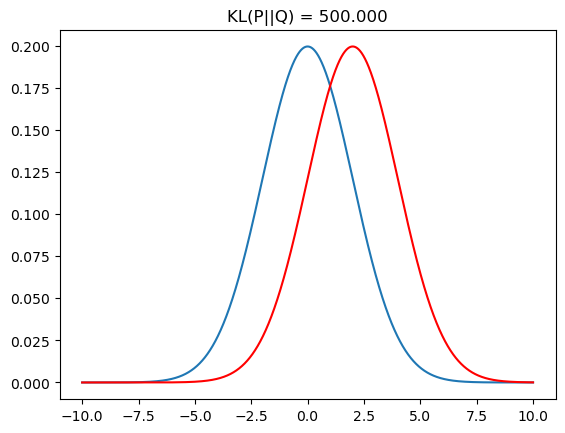

In [43]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

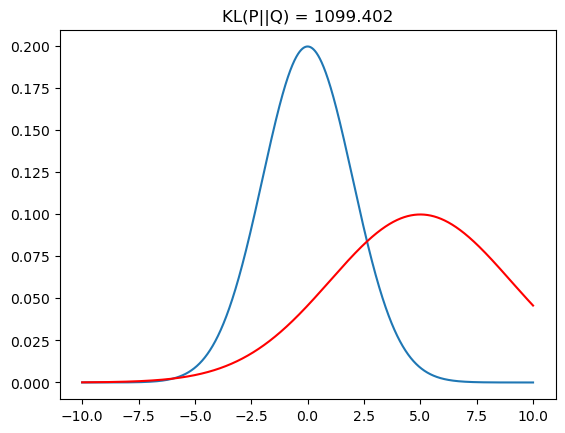

In [45]:
q = norm.pdf(x, 5, 4)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

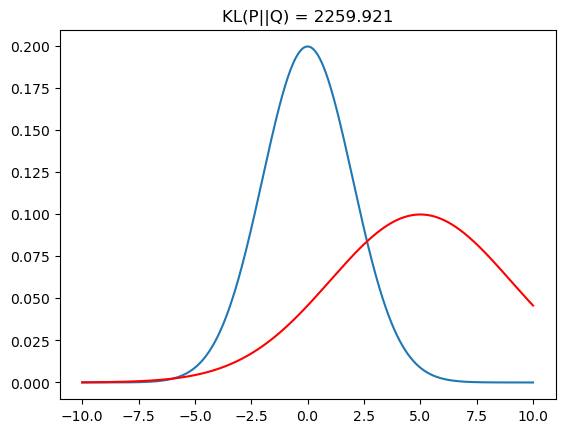

In [46]:
q = norm.pdf(x, 5, 4)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(q, p))
plt.plot(x, p)
plt.plot(x, q, c='red')

### london model

#### выходят очень всратые траектории если изменить dt

In [82]:
Env = Environment()
Ag = Agent(Env)
PCs = PlaceCells(Ag)
Ag.__dict__['params']['dt'] = 0.3
Ag.dt = 0.3

In [83]:
for i in range(6000):
    Ag.update()
    PCs.update()

C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\ratinabox\utils.py:367: RuntimeWarning: overflow encountered in scalar multiply
  dx = theta * (drift - x) * dt + sigma * np.random.normal(size=x.shape, scale=dt)
C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\ratinabox\utils.py:299: RuntimeWarning: invalid value encountered in cos
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\ratinabox\utils.py:299: RuntimeWarning: invalid value encountered in sin
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\ratinabox\Agent.py:289: RuntimeWarning: invalid value encountered in scalar add
  self.rotational_velocity += utils.ornstein_uhlenbeck(


In [84]:
pd.DataFrame(Ag.history)

,t,pos,distance_travelled,vel,rot_vel,head_direction
0,0.3,"[0.43969632855865154, 0.48504561412107544]",0.027921,"[0.06266636625354446, 0.06881211686679416]",-8.646613,"[0.6733190287767686, 0.7393520714024604]"
1,0.6,"[0.4128269214649806, 0.5077616199197658]",0.063106,"[-0.08956469031223639, 0.07572001932896774]",5.358856,"[-0.763661551970906, 0.6456167857494003]"
2,0.9,"[0.43044474043648095, 0.5138448503388843]",0.081745,"[0.058726063238334444, 0.020277434730395043]",-7.024301,"[0.9452386321555063, 0.32638003658432824]"
3,1.2,"[0.40904610793112833, 0.49726838551290714]",0.108813,"[-0.07132877501784207, -0.055254882753257115]",-9.383201,"[-0.7905487505162282, -0.612399112554248]"
4,1.5,"[0.4316663278589216, 0.4748865920432127]",0.140634,"[0.07540073309264428, -0.07460597823231478]",5.674669,"[0.7108431472347392, -0.7033505669503728]"
...,...,...,...,...,...,...
5995,1798.8,"[nan, nan]",21.696204,"[nan, nan]",NaN,"[nan, nan]"
5996,1799.1,"[nan, nan]",21.696204,"[nan, nan]",NaN,"[nan, nan]"
5997,1799.4,"[nan, nan]",21.696204,"[nan, nan]",NaN,"[nan, nan]"
5998,1799.7,"[nan, nan]",21.696204,"[nan, nan]",NaN,"[nan, nan]"


(<Figure size 250x250 with 1 Axes>, <Axes: >)

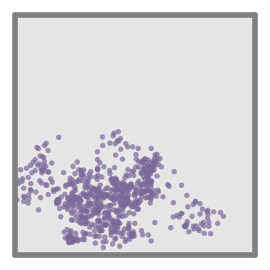

In [85]:
# Plot data 
Ag.plot_trajectory()
#PCs.plot_rate_timeseries()

In [86]:
#vars(Environment)

In [87]:
#vars(Agent)

#### поставим обычный dt

In [88]:
Env = Environment()
Ag = Agent(Env)
PCs = PlaceCells(Ag)
Ag.__dict__['params']

{'name': None,
 'dt': 0.05,
 'speed_coherence_time': 0.7,
 'speed_mean': 0.08,
 'speed_std': 0.08,
 'rotational_velocity_coherence_time': 0.08,
 'rotational_velocity_std': 2.0943951023931953,
 'head_direction_smoothing_timescale': 0.15,
 'thigmotaxis': 0.5,
 'wall_repel_distance': 0.1,
 'wall_repel_strength': 1.0,
 'save_history': True}

In [142]:
print(int(36000 * 0.05 / 60), 'minutes')

30 minutes


In [89]:
for i in range(36000):
    Ag.update()
    PCs.update()

In [131]:
Ag.history['pos']

[[0.4189866199157832, 0.4213766761110147],
 [0.4141611310682367, 0.42418418783485484],
 [0.40765003899041935, 0.4265239611027762],
 [0.400882849862226, 0.42709931896736864],
 [0.3951680429666547, 0.42692930735407403],
 [0.3899768898493479, 0.42633721811978437],
 [0.38462567645438656, 0.4261642315028941],
 [0.3797112774395499, 0.4260458473561572],
 [0.3737014865017064, 0.4267946596717921],
 [0.367072990353109, 0.42680383567834845],
 [0.35943781914036976, 0.4262009703856528],
 [0.3510188627873767, 0.42703406840130564],
 [0.34077710917842263, 0.430276605484463],
 [0.3333945159131145, 0.434797956750173],
 [0.32512289840893444, 0.44096656694047937],
 [0.31710236188065116, 0.44711867860110305],
 [0.3061625047656932, 0.4537009942725793],
 [0.2934787102728546, 0.4578765584580743],
 [0.2815767499671944, 0.4613917001112089],
 [0.2663496757794237, 0.4646753805757722],
 [0.25078823585162574, 0.46498629520283635],
 [0.2360346158043449, 0.4638775723088505],
 [0.2232456660439625, 0.46209011668455247]

In [132]:
# dfs_london = {}
# dfs_london[1] = pd.DataFrame(Ag.history)
# df1 = pd.DataFrame(Ag.history)

(<Figure size 250x250 with 1 Axes>, <Axes: >)

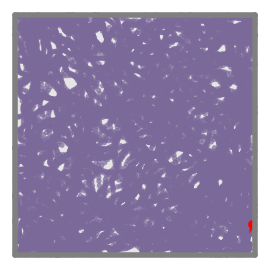

In [122]:
# Plot data 
Ag.plot_trajectory()
#PCs.plot_rate_timeseries()

In [125]:
#Ag.__dict__

In [133]:
pos = Ag.history['pos']
pos = np.array(pos)

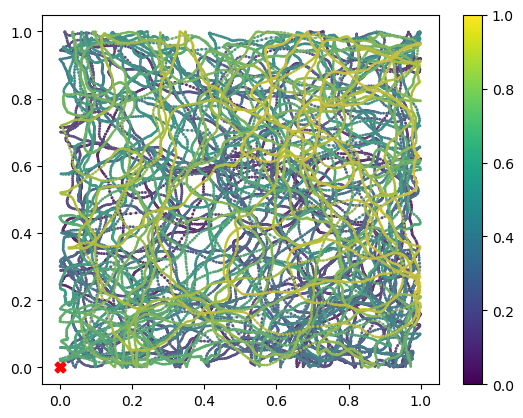

In [137]:
plot_trajectory(pos[:, 0], pos[:, 1])

In [146]:
df = pd.DataFrame(list(zip(Ag.history['t'],pos[:, 0], pos[:, 1])),columns =['time','x', 'y'])
df

,time,x,y
0,0.05,0.418987,0.421377
1,0.10,0.414161,0.424184
2,0.15,0.407650,0.426524
3,0.20,0.400883,0.427099
4,0.25,0.395168,0.426929
...,...,...,...
35995,1799.80,0.992319,0.148334
35996,1799.85,0.990755,0.141456
35997,1799.90,0.988244,0.134878
35998,1799.95,0.985247,0.128805


In [148]:
df1 = df.copy()

## make several dfs base on model

### make (can be skipped)

In [153]:
def make_london_traj(minutes = 30, dt = 0.05, show = False):
    Env = Environment()
    Ag = Agent(Env)
    n = minutes * 60 / dt
    for i in range(int(n)):
        Ag.update()
        PCs.update()
    pos = Ag.history['pos']
    pos = np.array(pos)
    df = pd.DataFrame(list(zip(Ag.history['t'],pos[:, 0], pos[:, 1])),columns =['time','x', 'y'])
    if show:
        plot_trajectory(pos[:, 0], pos[:, 1])
    return df

In [154]:
dfs_london = {}
for i in range(10):
    dfs_london[i] = make_london_traj()

In [157]:
# with open('LondonModelMay24.pickle', 'wb') as handle:
#     pickle.dump(dfs_london, handle)

### preprocessing (can be skipped)

In [159]:
# 3. rescale x and y coords to fit area size 
# может добавить функцию rescale_coord в processing.py? TODO
def rescale_coord(data, new_min, new_max):
    min_old_x, max_old_x = np.min(data), np.max(data)
    data_rescaled = ((data - min_old_x) / (max_old_x - min_old_x)) * (new_max - new_min) + new_min
    return data_rescaled

AREA_SIZE = [-40, 40]
rescaled_dfs_dict = {}
for k, df in dfs_london.items():
    df = df.dropna()
    rescaled_x = rescale_coord(df['x'].to_numpy(), AREA_SIZE[0], AREA_SIZE[1])
    rescaled_y = rescale_coord(df['y'].to_numpy(), AREA_SIZE[0], AREA_SIZE[1])
    df.loc[:, 'x'] = rescaled_x
    df.loc[:, 'y'] = rescaled_y

    rescaled_dfs_dict[k] = df

In [162]:
NEW_DT = 0.3
# 5. resample to required dt


def resample_data_to_larger_timestep(df, original_dt, new_dt):
    from scipy.signal import resample

    num_original_points = df.shape[0]
    duration = num_original_points * original_dt
    num_new_points = int(duration / new_dt)
    
    resampled_dfnp = resample(df.to_numpy()[:, 1:], num_new_points, axis=0)
    new_time = np.linspace(df['time'].iloc[0], df['time'].iloc[-1], num_new_points)
    #added 3 down change
    #print(resampled_dfnp[:, 0])
    #print(resampled_dfnp)
    if len(resampled_dfnp) > 1:
        resampled_df = pd.DataFrame({'time': new_time,
                                     'x': resampled_dfnp[:, 0], 
                                     'y': resampled_dfnp[:, 1]})
    #added 2 down change
    else:
        resampled_df = pd.DataFrame(columns=['time','x','y'])
    return resampled_df


kk2 = {}
for k, df in rescaled_dfs_dict.items():
    newdf = resample_data_to_larger_timestep(df,0.05,NEW_DT)
    kk2[k] = newdf

In [164]:
# add angles, delta_angles, step len, 
def add_angles(df):
    dt = df['time'].diff()
    vvx = df['x'].diff() / dt 
    vvy = df['y'].diff() / dt 
    dt[0], vvx[0], vvy[0] = 0., 0., 0.

    Xx = np.arctan2(vvx, vvy)
    Nres = normalize_angles_2pi(Xx)
    ang = np.rad2deg(Nres) % 360
    df['angles'] = ang
    return df

def add_delta_angles(df):
    dangles = df['angles'].diff()
    dangles[0] = 0.
    dangles_rad = np.deg2rad(dangles)
    normed_dangels_rad = normalize_angles_2pi(dangles_rad)
    df['delta_angle'] = np.rad2deg(normed_dangels_rad) % 360
    return df

def add_step_length(df):
    dx = df['x'].diff()
    dy = df['y'].diff()
    dx[0], dy[0] = 0., 0.,
    step_lens = (dx**2 + dy**2)**0.5
    df['step_length'] = step_lens
    return df


dict_angles = {}
for a, d in kk2.items():
    df_ang = add_angles(d)
    df_dt_ang = add_delta_angles(df_ang)
    df_step = add_step_length(df_dt_ang)
    dict_angles[a] = df_step

# sort by areas of open field
#долго выполняется если рисовать все графики


def sort_walls_area(tr, border_tr, wall_percent=0.1): 
    ylen = border_tr['ymax'] - border_tr['ymin'] 
    xlen = border_tr['xmax'] - border_tr['xmin'] 
    xl = border_tr['xmin'] + xlen * wall_percent
    xr = border_tr['xmax'] - xlen * wall_percent
    yd = border_tr['ymin'] + ylen * wall_percent
    yu = border_tr['ymax'] - ylen * wall_percent

    tr['near_wall'] = 0.
    for i in range(len(tr)):     
        if tr['x'].iloc[i] < xl:
            if tr['y'].iloc[i] > yu:
                tr['near_wall'].iloc[i] = 40
            elif tr['y'].iloc[i] < yd:
                tr['near_wall'].iloc[i] = 30
            else:
                tr['near_wall'].iloc[i] = 4
        elif tr['x'].iloc[i] > xr:
            if tr['y'].iloc[i] > yu:
                tr['near_wall'].iloc[i] = 10
            elif tr['y'].iloc[i] < yd:
                tr['near_wall'].iloc[i] = 20
            else:
                tr['near_wall'].iloc[i] = 2
        elif tr['y'].iloc[i] > yu:
            tr['near_wall'].iloc[i] = 1
        elif tr['y'].iloc[i] < yd:
            tr['near_wall'].iloc[i] = 3
    return tr

def plot_wall_sorted_samples(df, plot_title):
    all_areas = [40, 30, 20, 10, 4, 3, 2, 1, 0]
    for a in all_areas:
        x = df.loc[df['near_wall'] == a]['x']
        y = df.loc[df['near_wall'] == a]['y']
        plt.scatter(x, y, s=1.5, label=str(a))
    plt.gca().set_aspect('equal')
    plt.title(plot_title)
    plt.legend(loc='center')
    plt.show()


wall_perc = 0.1
dict_walls = {}
bord40 =  {'xmin': -40,'xmax': 40,'ymin': -40,'ymax': 40}  
for a, d in dict_angles.items():
    df = sort_walls_area(d, bord40, wall_perc)
    #plot_wall_sorted_samples(sub_df, k)
    dict_walls[a] = df


In [165]:
# highlight pauses

#реализацию оригинальных семплов с скользящим окном см чуть ниже в черновике. я не поняла как ее сомещать с ресемплом
window_size = 2 #так ближе всего к 0.5 с

def movementOrNot(step_sum):
    if step_sum == -100:
        out = 'NotDefined'
    elif step_sum > max_step_of_stop:
        out = 'Move'
    elif step_sum <= max_step_of_stop:
        out = 'Stop'
    else:
        out = 'error'
    return out

#добавляем dx
#PARAMETER TO CHANGE !!!
max_step_of_stop = 2.3


dfs_stop = {}
for k, df in dict_walls.items():
    #if len(df) >= window_size:
    df['step_sum_0.5'] = df['step_length'].rolling(window_size).sum()
    df['step_sum_0.5']=df['step_sum_0.5'].fillna(-100)
    func = np.vectorize(movementOrNot)
    df["movement"] = func(df['step_sum_0.5'])
    dfs_stop[k] = df


In [166]:
merg_with_pauses = {}
for k, g in dfs_stop.items():
    g['change area'] = g['near_wall'].diff()
    g = g.iloc[1:].reset_index()
    g['new_change_area'] = 'bad'
    #new_change_area при желании можно и после мерджа добавить
    g.loc[g['change area'].isin([-1, -2, -3, -4]), 'new_change_area'] = 'wall_to_center'
    g.loc[g['change area'].isin([1, 2, 3, 4]), 'new_change_area'] = 'center_to_wall'
    g.loc[g['change area'].isin([9, 8, 18, 17, 27, 26, 36, 39]), 'new_change_area'] = 'wall_to_corner'
    g.loc[g['change area'].isin([-9, -8, -18, -17, -27, -26, -36, -39]), 'new_change_area'] = 'corner_to_wall'
    g.loc[g['change area'].isin([10, 20, 30, 40]), 'new_change_area'] = 'center_to_corner'
    g.loc[g['change area'].isin([-10, -20, -30, -40]), 'new_change_area'] = 'corner_to_center'
    g.loc[g['change area'].isin([0]), 'new_change_area'] = 'no_change'
    merg_with_pauses[k] = g
    merg_with_pauses[k] = merg_with_pauses[k].reset_index(drop=True)

merg_only_move = {}
for k in merg_with_pauses:
    merg_only_move[k] = merg_with_pauses[k].loc[merg_with_pauses[k]['movement']=='Move']

In [168]:
two_dict = {'only move' : merg_only_move , 'with pauses' : merg_with_pauses}

In [169]:
with open('Preproc_LondonModelMay24.pickle', 'wb') as handle:
    pickle.dump(two_dict, handle)

### dstrbtns

In [6]:
merg_only_move = two_dict['only move']

In [7]:
#отмена (убираем паузы т к их не учитываем для распределний. параметр 0.5 т к используемый вероятности паузы основаны на max_step_of_stop = 1 и window_size = 2) 
#(data_preprocessing+DeltaDirections01_checked_Copy1.ipynb)
def merge_df_1d(df_dict, areas_list):
    delta_ang_list = []
    for k, df in df_dict.items():
        df_ar = df.loc[df['near_wall'].isin(areas_list)]
        #df_ar = df_ar.loc[df_ar['step_length']>=0.5]
        delta_ang_list.append(df_ar)
    dfN = pd.concat(delta_ang_list)
    dfN = dfN.reset_index(drop=True)
    return dfN

In [8]:
merg_only_move[0]['near_wall'].value_counts()

near_wall
0.0     3152
3.0      436
4.0      430
1.0      382
2.0      351
40.0      88
30.0      75
20.0      54
10.0      43
Name: count, dtype: int64

In [9]:
model_all_merge = {}
model_all_merge['corner'] = merge_df_1d(merg_only_move, [10, 20, 30, 40])
model_all_merge['wall'] = merge_df_1d(merg_only_move, [1, 2, 3, 4])
model_all_merge['center'] = merge_df_1d(merg_only_move, [0])

In [10]:
lens = {}
for aa in model_all_merge:
    print(aa)
    print(len(model_all_merge[aa]))
    lens[aa] = len(model_all_merge[aa])

corner
2137
wall
16652
center
30894


In [ ]:
model_all_merge['corner']

,index,time,x,y,angles,delta_angle,step_length,near_wall,step_sum_0.5,movement,change area,new_change_area
0,1,0.350042,-33.565255,41.948459,8.583823,8.583823,13.736494,40.0,13.736494,Move,36.0,wall_to_corner
1,2,0.650083,-33.926923,36.582822,183.856152,175.272329,5.377812,40.0,19.114306,Move,0.0,no_change
2,3,0.950125,-33.695064,36.029842,157.252226,333.396074,0.599621,40.0,5.977432,Move,0.0,no_change
3,139,41.755793,-32.638891,-33.152596,298.414384,359.940568,1.242653,30.0,3.388435,Move,27.0,wall_to_corner
4,141,42.355876,-34.851323,-33.582652,242.070571,318.197176,1.422210,30.0,2.406807,Move,0.0,no_change
...,...,...,...,...,...,...,...,...,...,...,...,...
2132,5860,1758.294207,-33.503682,36.726145,311.128790,340.546503,2.933620,40.0,5.010890,Move,39.0,wall_to_corner
2133,5861,1758.594249,-35.709599,38.088139,301.692325,350.563535,2.592508,40.0,5.526128,Move,0.0,no_change
2134,5862,1758.894291,-36.067503,39.032887,339.251563,37.559238,1.010269,40.0,3.602777,Move,0.0,no_change
2135,5864,1759.494374,-33.386145,39.088428,96.129789,26.136185,1.964035,40.0,2.739375,Move,0.0,no_change


In [13]:
delta_ang_hist

{'corner': [array([  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
         135., 141., 147., 153., 159., 165., 171., 177., 183., 189., 195.,
         201., 207., 213., 219., 225., 231., 237., 243., 249., 255., 261.,
         267., 273., 279., 285., 291., 297., 303., 309., 315., 321., 327.,
         333., 339., 345., 351., 357.]),
  (array([1.   , 0.95 , 0.905, 0.6  , 0.48 , 0.37 , 0.26 , 0.135, 0.16 ,
          0.11 , 0.07 , 0.065, 0.04 , 0.045, 0.04 , 0.03 , 0.045, 0.005,
          0.03 , 0.015, 0.02 , 0.03 , 0.02 , 0.025, 0.015, 0.025, 0.025,
          0.04 , 0.04 , 0.03 , 0.025, 0.05 , 0.01 , 0.01 , 0.035, 0.025,
          0.025, 0.04 , 0.005, 0.02 , 0.025, 0.02 , 0.   , 0.025, 0.015,
          0.02 , 0.045, 0.03 , 0.04 , 0.045, 0.095, 0.12 , 0.185, 0.225,
          0.29 , 0.525, 0.535, 0.745, 0.86 , 0.97 ]),)],
 'wall': [array([  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  6

In [17]:
l[1][0]

array([1.   , 0.95 , 0.905, 0.6  , 0.48 , 0.37 , 0.26 , 0.135, 0.16 ,
       0.11 , 0.07 , 0.065, 0.04 , 0.045, 0.04 , 0.03 , 0.045, 0.005,
       0.03 , 0.015, 0.02 , 0.03 , 0.02 , 0.025, 0.015, 0.025, 0.025,
       0.04 , 0.04 , 0.03 , 0.025, 0.05 , 0.01 , 0.01 , 0.035, 0.025,
       0.025, 0.04 , 0.005, 0.02 , 0.025, 0.02 , 0.   , 0.025, 0.015,
       0.02 , 0.045, 0.03 , 0.04 , 0.045, 0.095, 0.12 , 0.185, 0.225,
       0.29 , 0.525, 0.535, 0.745, 0.86 , 0.97 ])

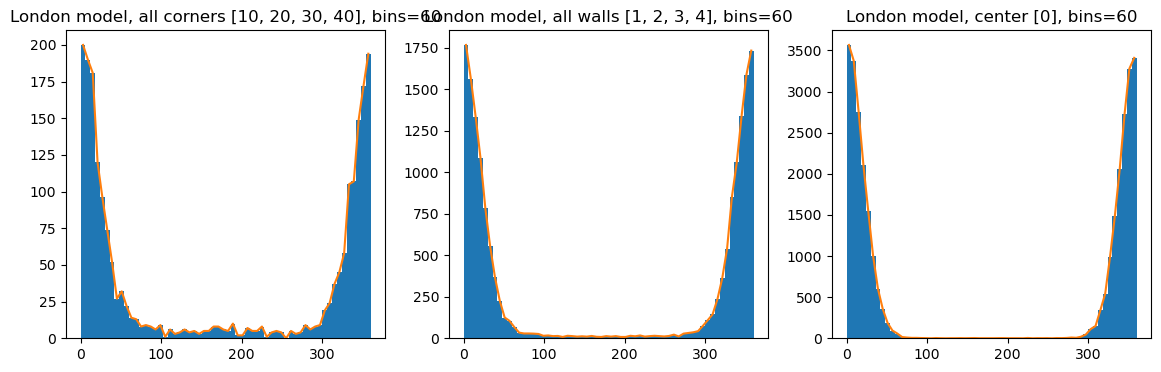

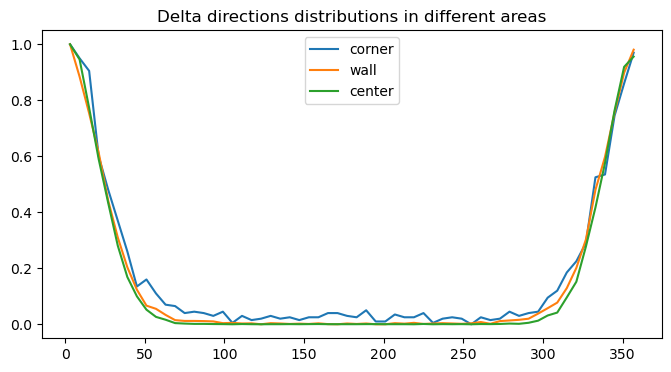

In [19]:
bins = 60

# #made df for every zone (corners, center, walls)
# aver_delta_angles = {}

# aver_corner = merge_df(near_corner_dict)
# print(f'For area corner df len={len(aver_corner)}')
# aver_delta_angles['corner'] = aver_corner['delta_angle']

# aver_wall = merge_df(near_wall_dict)
# print(f'For area wall df len={len(aver_wall)}')
# aver_delta_angles['wall'] = aver_wall['delta_angle']

# aver_center = merge_df(near_center_dict)
# print(f'For area center df len={len(aver_center)}')
# aver_delta_angles['center'] = aver_center['delta_angle']

#all normalized
def min_max_normalize(y):
    yn = (y - y.min()) / (y.max() - y.min())
    return yn, 


fig, axes = plt.subplots(1, 3, figsize=(14, 4))
delta_ang_hist = {}

freqs, binEdges, _ = axes[0].hist(model_all_merge['corner']['delta_angle'], range=(0, 360), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['corner']  = [bin_mid, freqs]
axes[0].plot(bin_mid, freqs)
axes[0].set_title(f'London model, all corners [10, 20, 30, 40], bins={bins}')

freqs, binEdges, _ = axes[1].hist(model_all_merge['wall']['delta_angle'], range=(0, 360), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['wall']  = [bin_mid, freqs]
axes[1].plot(bin_mid, freqs)
axes[1].set_title(f'London model, all walls [1, 2, 3, 4], bins={bins}')

freqs, binEdges, _ = axes[2].hist(model_all_merge['center']['delta_angle'], range=(0, 360), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['center']  = [bin_mid, freqs]
axes[2].plot(bin_mid, freqs)
axes[2].set_title(f'London model, center [0], bins={bins}')

plt.figure(figsize=(8,4))
for k, l in delta_ang_hist.items():
    l[1] = min_max_normalize(l[1])
    plt.plot(l[0], l[1][0], label=k)
plt.title('Delta directions distributions in different areas')
plt.legend()
plt.show()

# Save distributions
import pickle
with open(f'model_london_delt_ang_distr_0_3_s_bins_{bins}.pkl', 'wb') as fp:    
    pickle.dump(delta_ang_hist, fp)

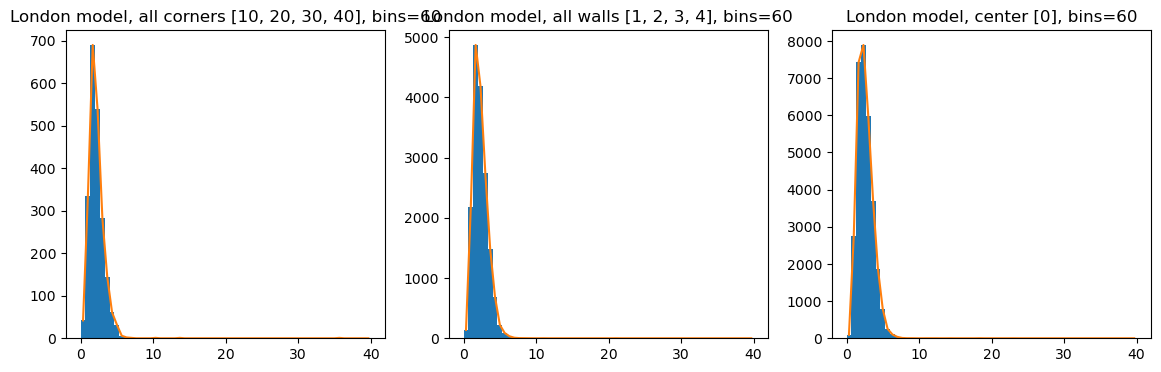

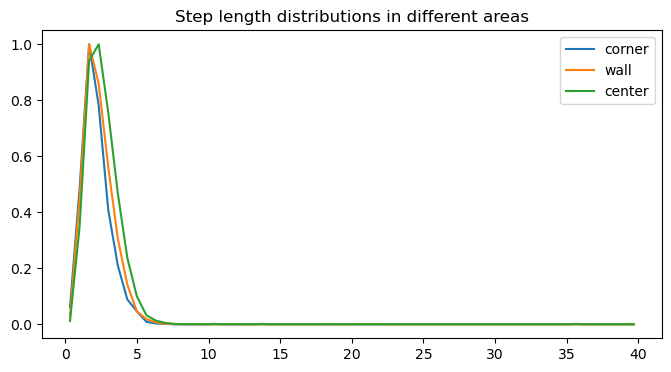

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
delta_ang_hist = {}

freqs, binEdges, _ = axes[0].hist(model_all_merge['corner']['step_length'], range=(0, 40), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['corner']  = [bin_mid, freqs]
axes[0].plot(bin_mid, freqs)
axes[0].set_title(f'London model, all corners [10, 20, 30, 40], bins={bins}')

freqs, binEdges, _ = axes[1].hist(model_all_merge['wall']['step_length'], range=(0, 40), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['wall']  = [bin_mid, freqs]
axes[1].plot(bin_mid, freqs)
axes[1].set_title(f'London model, all walls [1, 2, 3, 4], bins={bins}')

freqs, binEdges, _ = axes[2].hist(model_all_merge['center']['step_length'], range=(0, 40), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['center']  = [bin_mid, freqs]
axes[2].plot(bin_mid, freqs)
axes[2].set_title(f'London model, center [0], bins={bins}')

plt.figure(figsize=(8,4))
for k, l in delta_ang_hist.items():
    l[1] = min_max_normalize(l[1])
    plt.plot(l[0], l[1][0], label=k)
plt.title('Step length distributions in different areas')
plt.legend()
plt.show()

# Save distributions
import pickle
with open(f'model_london_step_length_distr_0_3_s_bins_{bins}.pkl', 'wb') as fp:    
    pickle.dump(delta_ang_hist, fp)